
##**Credit Card Fraud Detection**##

Machine learning has emerged as a powerful tool in detecting credit card fraud in the UK. Leveraging vast amounts of data and advanced algorithms, machine learning models can analyze patterns, anomalies, and historical fraud cases to identify fraudulent transactions accurately.

These models are trained on extensive datasets that include both legitimate and fraudulent transactions, enabling them to learn the characteristics and patterns associated with fraudulent activities. By analyzing factors such as transaction amount, location, time, and user behavior, machine learning algorithms can detect deviations from normal patterns and flag potentially fraudulent transactions in real-time.

Machine learning-based fraud detection systems in the UK continuously evolve as they learn from new fraud patterns and adapt to emerging threats. These systems can reduce false positives and negatives, leading to more accurate fraud identification and minimizing disruption to legitimate cardholders.

Collaboration between financial institutions, payment processors, and data scientists is crucial in developing effective machine learning models. Sharing anonymized transaction data and collaborating on research helps improve the performance and effectiveness of fraud detection algorithms.

Machine learning-based detection systems serve as an essential defense against credit card fraud in the UK, enhancing security measures and safeguarding the financial well-being of both consumers and financial institutions.

In this research, we will use machine learning apprach to detect credit card frauds and also contribute to existing research on this topic.




##**Data Reading**##

This data is available in the google drive and google drive will be the primary location of storing the credit card fraud data. We will as well read the data from the same location.

In [1]:
from google.colab import drive # The code reading the folder containing all the images in the zip folders on google drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**Libraries**##

Machine learning and Analytics basically relies on different libraries. These libraries are listed and imported below:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

**Data Reading**

The data is read from csv files available in google drive and is assigned to a variable called "Data" below:

In [3]:
Data = pd.read_csv('/content/gdrive/MyDrive/creditcard.csv')
Data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Describe the data to show the summary of the entire datasest.

In [4]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Data Types**
The data types are shown with the function below: There are different kinds of data types. They are float, int, object etc.

In [5]:
Data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Target Analysis**

Targets are like the end result of every experiment. It is a guiding variable to any experiment. It is the only variable to predict. In this research, the target variable is the class. And the class only have two levels. This makes this a binary classification problem. 0 here is the non-fradulent customers and the 1 represent the fraudulent customers.

In [6]:
Data['Class'].unique()

array([0, 1])

<Axes: xlabel='Class', ylabel='Amount'>

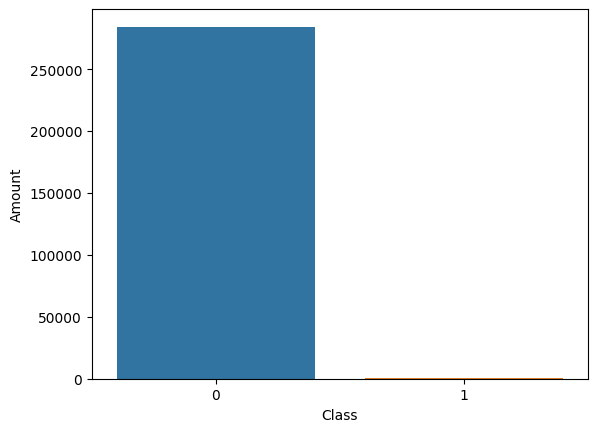

In [7]:
Groupby_Data = Data.groupby('Class')['Amount'].count().reset_index()
sns.barplot(x= 'Class', y= 'Amount', data= Groupby_Data)

**Aggregate Function**

This aspect enables us to show the count of the entire datasets, the fraudulent cases and non-fraudulent cases.

In [8]:
Data['Class'].count() #Total count

284807

In [9]:
Fraud_Cases = Data[Data['Class'] == 1]
Fraud_Cases['Class'].count() # Fraudulent Cases

492

In [10]:
Non_Fraudulent = Data[Data['Class'] == 0]
Non_Fraudulent['Class'].count() #Non fraudulent cases.

284315

Text(0, 0.5, 'Volumes')

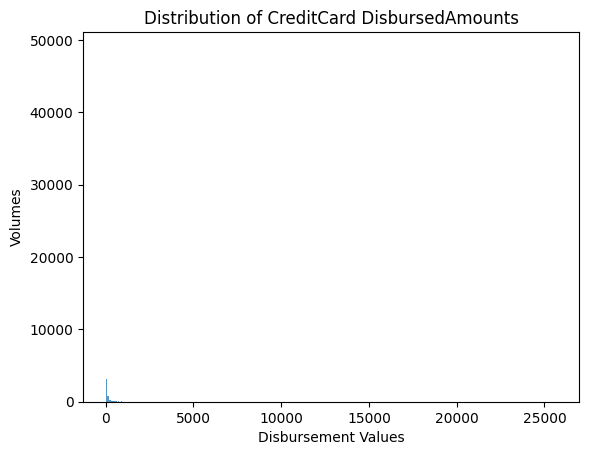

In [11]:

sns.histplot(x ='Amount', data= Data )
plt.title('Distribution of CreditCard DisbursedAmounts')
plt.xlabel('Disbursement Values')
plt.ylabel('Volumes') # Histograms of the amount disbursed.

In [12]:
Features = Data.drop('Class', axis = 1) # Ascribing the Features variable in a seperate variables and removing the target which is the Class.
#Features.dtypes

In [13]:
Class = Data['Class']
Class.tail(5)

284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

##**Feature Selection**##

There are different methods of feature selection. In this research, we will be using only a few that are listed below.

1. The Heatmap method
2. Chi2
3. Xtra Tree Clssifier.
4. F.Regression.

**Heatmap Technic**

<Axes: >

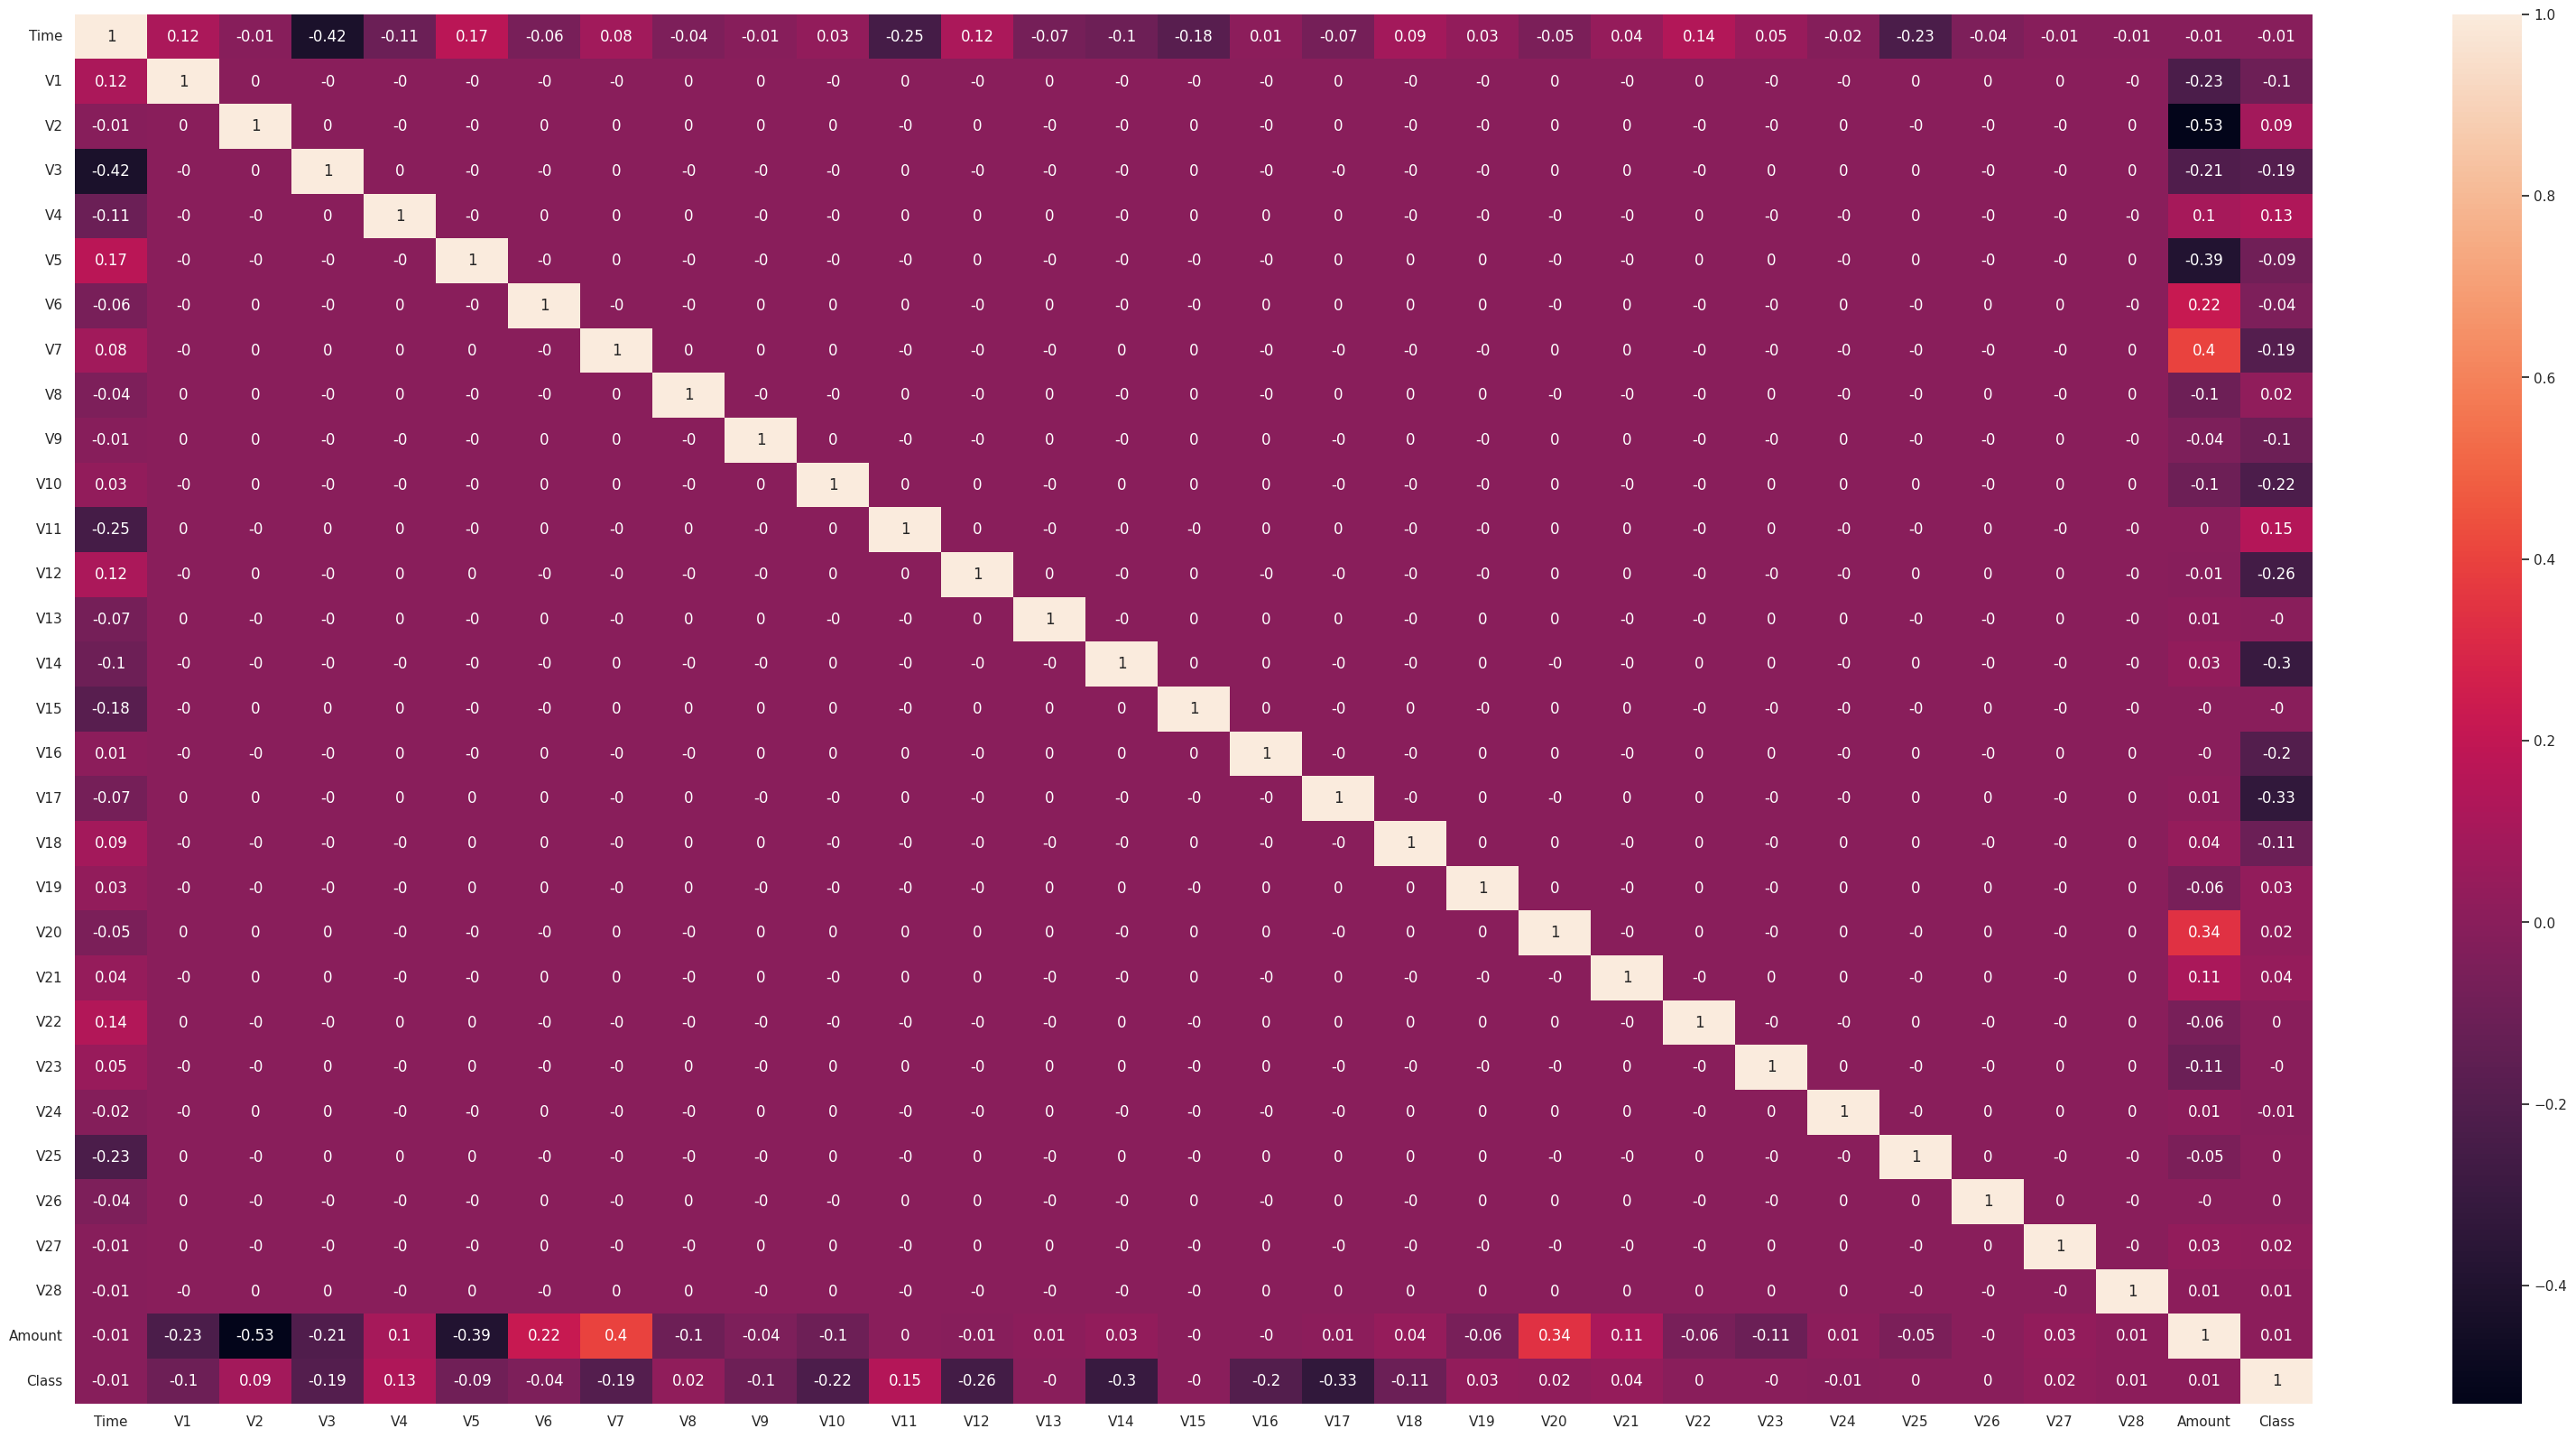

In [14]:
Correlation = Data.corr().round(2)
sns.set(rc={'figure.figsize':(40,20)})
sns.heatmap(Correlation,xticklabels = Correlation.columns, yticklabels=Correlation.columns, annot = True)

##Chi2##

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, chi2


# Apply the MinMaxScaler to scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Features)

# Apply the KBest feature selection
k = 10  # Number of best features to select
kbest = SelectKBest(score_func=chi2, k=k)
selected_features = kbest.fit_transform(X_scaled, Class)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = Features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
V3
V4
V9
V10
V11
V12
V14
V16
V17
V18


##**F-Regressions**##

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2


# Apply the KBest feature selection
k = 10  # Number of best features to select
kbest = SelectKBest(score_func=f_regression, k=k)
selected_features = kbest.fit_transform(Features, Class)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = Features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
V3
V4
V7
V10
V11
V12
V14
V16
V17
V18


##**Extra Tree Classifier**##

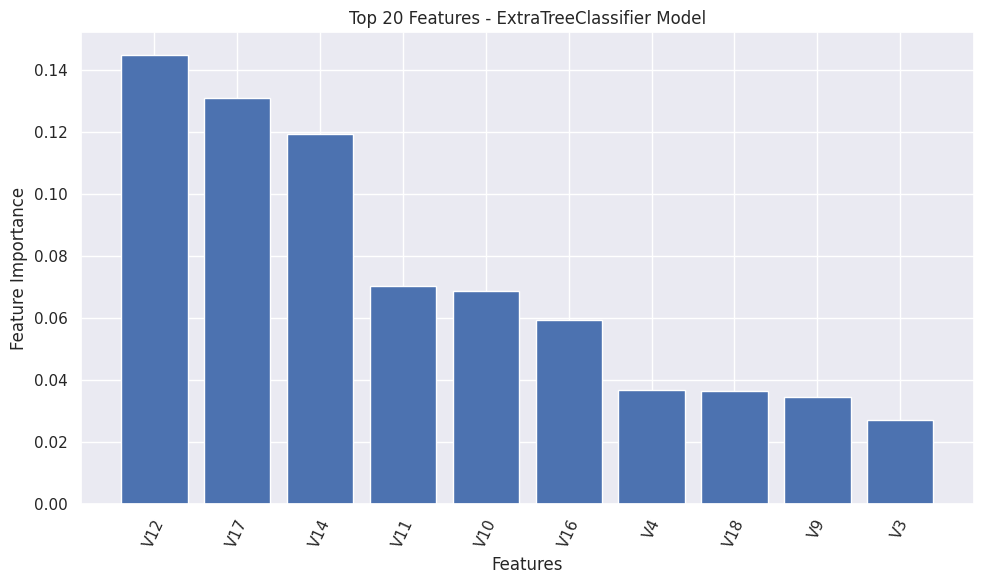

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Feature selection with ExtraTreeClassifier
model = ExtraTreesClassifier()
model.fit(Features, Class)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
k = 10  # Number of best features to select
selected_indices = indices[:k]
selected_features = Features.columns[selected_indices]
selected_importances = importances[selected_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_features, selected_importances)
plt.xticks(rotation=65)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 20 Features - ExtraTreeClassifier Model")
plt.tight_layout()
plt.show()

##**Oversampling**##

This classification problem is sure not a balance one. The imbalance ratio is very wide. There is need to oversample the minority class to have a 1:1 ratio. This process is as seen below:


Class distribution after oversampling: {0: 284315, 1: 284315}


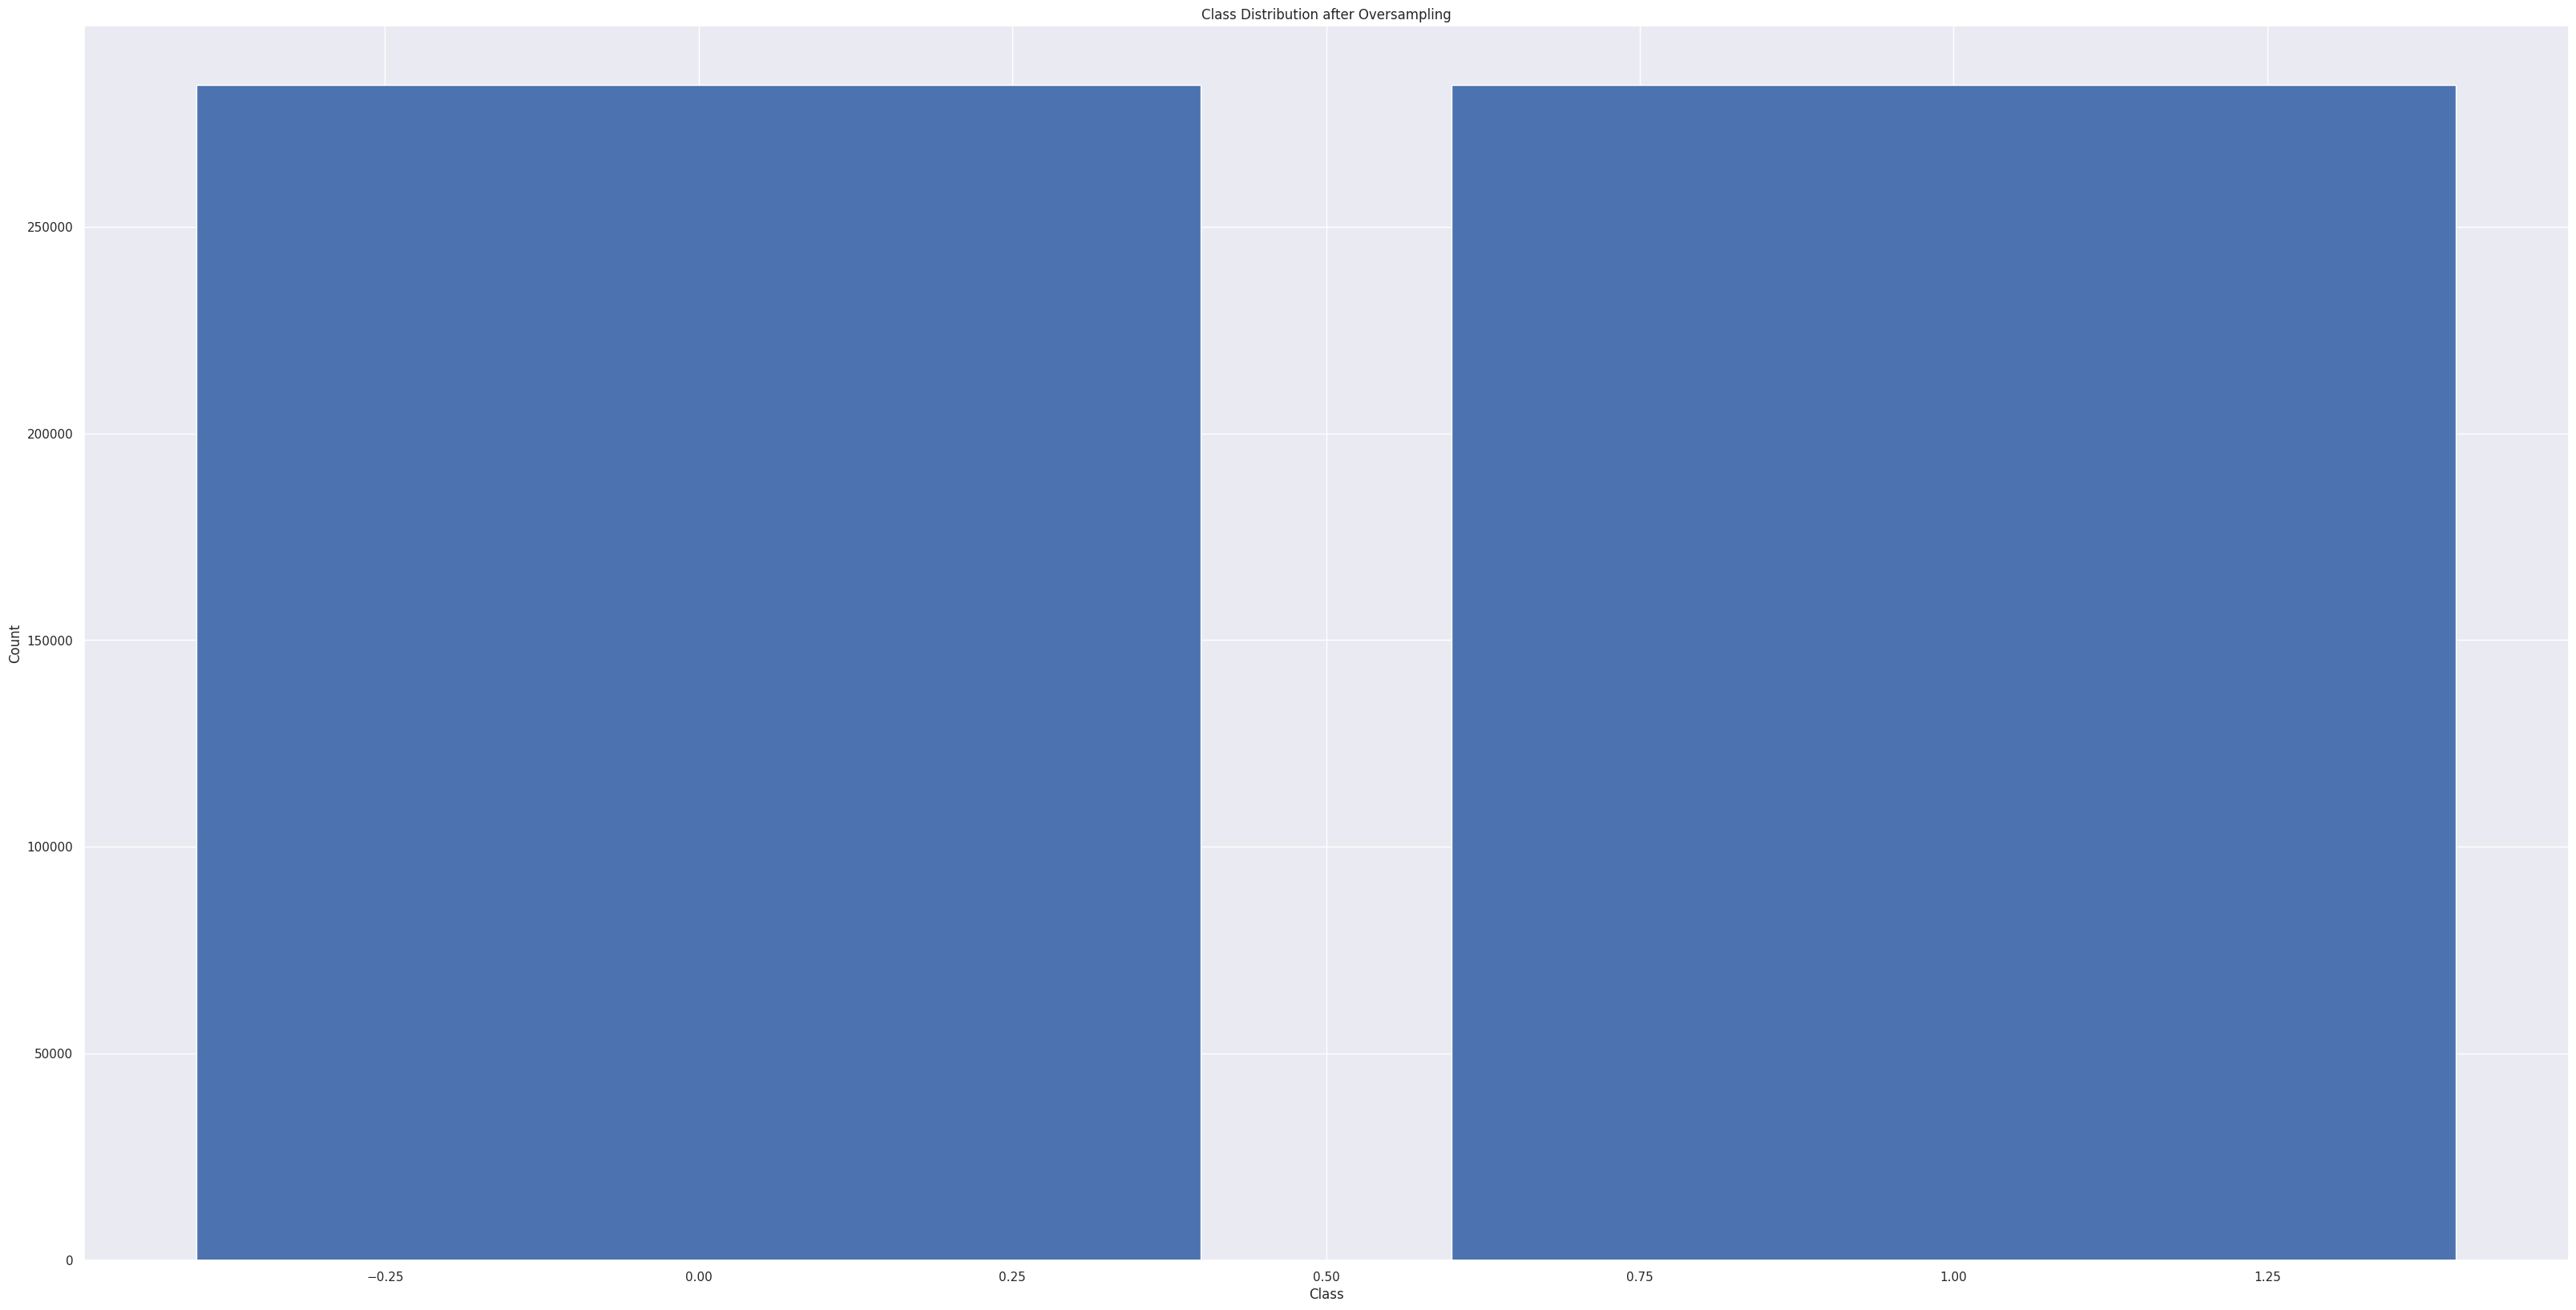

In [18]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Original dataset counts
minority_class_count = Fraud_Cases['Class'].count() 
majority_class_count = Non_Fraudulent['Class'].count()

# Create an oversampler instance
oversampler = RandomOverSampler(sampling_strategy='minority')

# Reshape the target variable to match the expected format
Class = np.array(Class).reshape(-1, 1)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(Features, Class)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Print class distribution after oversampling
print("Class distribution after oversampling:", class_distribution)

# Plot the bar chart
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after Oversampling')
plt.show()

In [19]:
#X_resampled.dtypes
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

##Split the Data into Training and Testing##

To prepare the the data for machine learning, there is need to bisect the data into training and testing data with a ratio of 80: 20. This is seen below:

In [20]:
#Spliting the PPS_BioData datasets into training and testing.
X_train, X_test, y_train, y_test = train_test_split(Features, Class, stratify= Class,test_size=0.2)
print('Shapes XTrain:', X_train.shape) #Print the shape of the x-train
print('Shapes XTest:', X_test.shape)



Shapes XTrain: (227845, 30)
Shapes XTest: (56962, 30)


##Fit and Evaluate Regression Model##

We will be fitting and evluating the model on all the features at this stage.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model = LogisticRegression()

# fit model
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_prob))
#Confusion Matrix of the Model.
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9990344440153085
Precision: 0.7721518987341772
Recall: 0.6224489795918368
F1 score: 0.6892655367231638
ROC AUC score: 0.9101443616275997
Confusion matrix:
 [[56846    18]
 [   37    61]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Comments**

The logistics regression model metrics above shows the model fairly perform well in terms of predicting positive and negative cases. There are 79 wrong predictions as seen in the confusion matrix.

**VISUALISATION: AUC AND CONFUSION MATRIX**

These two metrics shows the overall model performance. It is visualised below: The AUC in particular shows how the model is able to predict both positive and negative cases correctly.

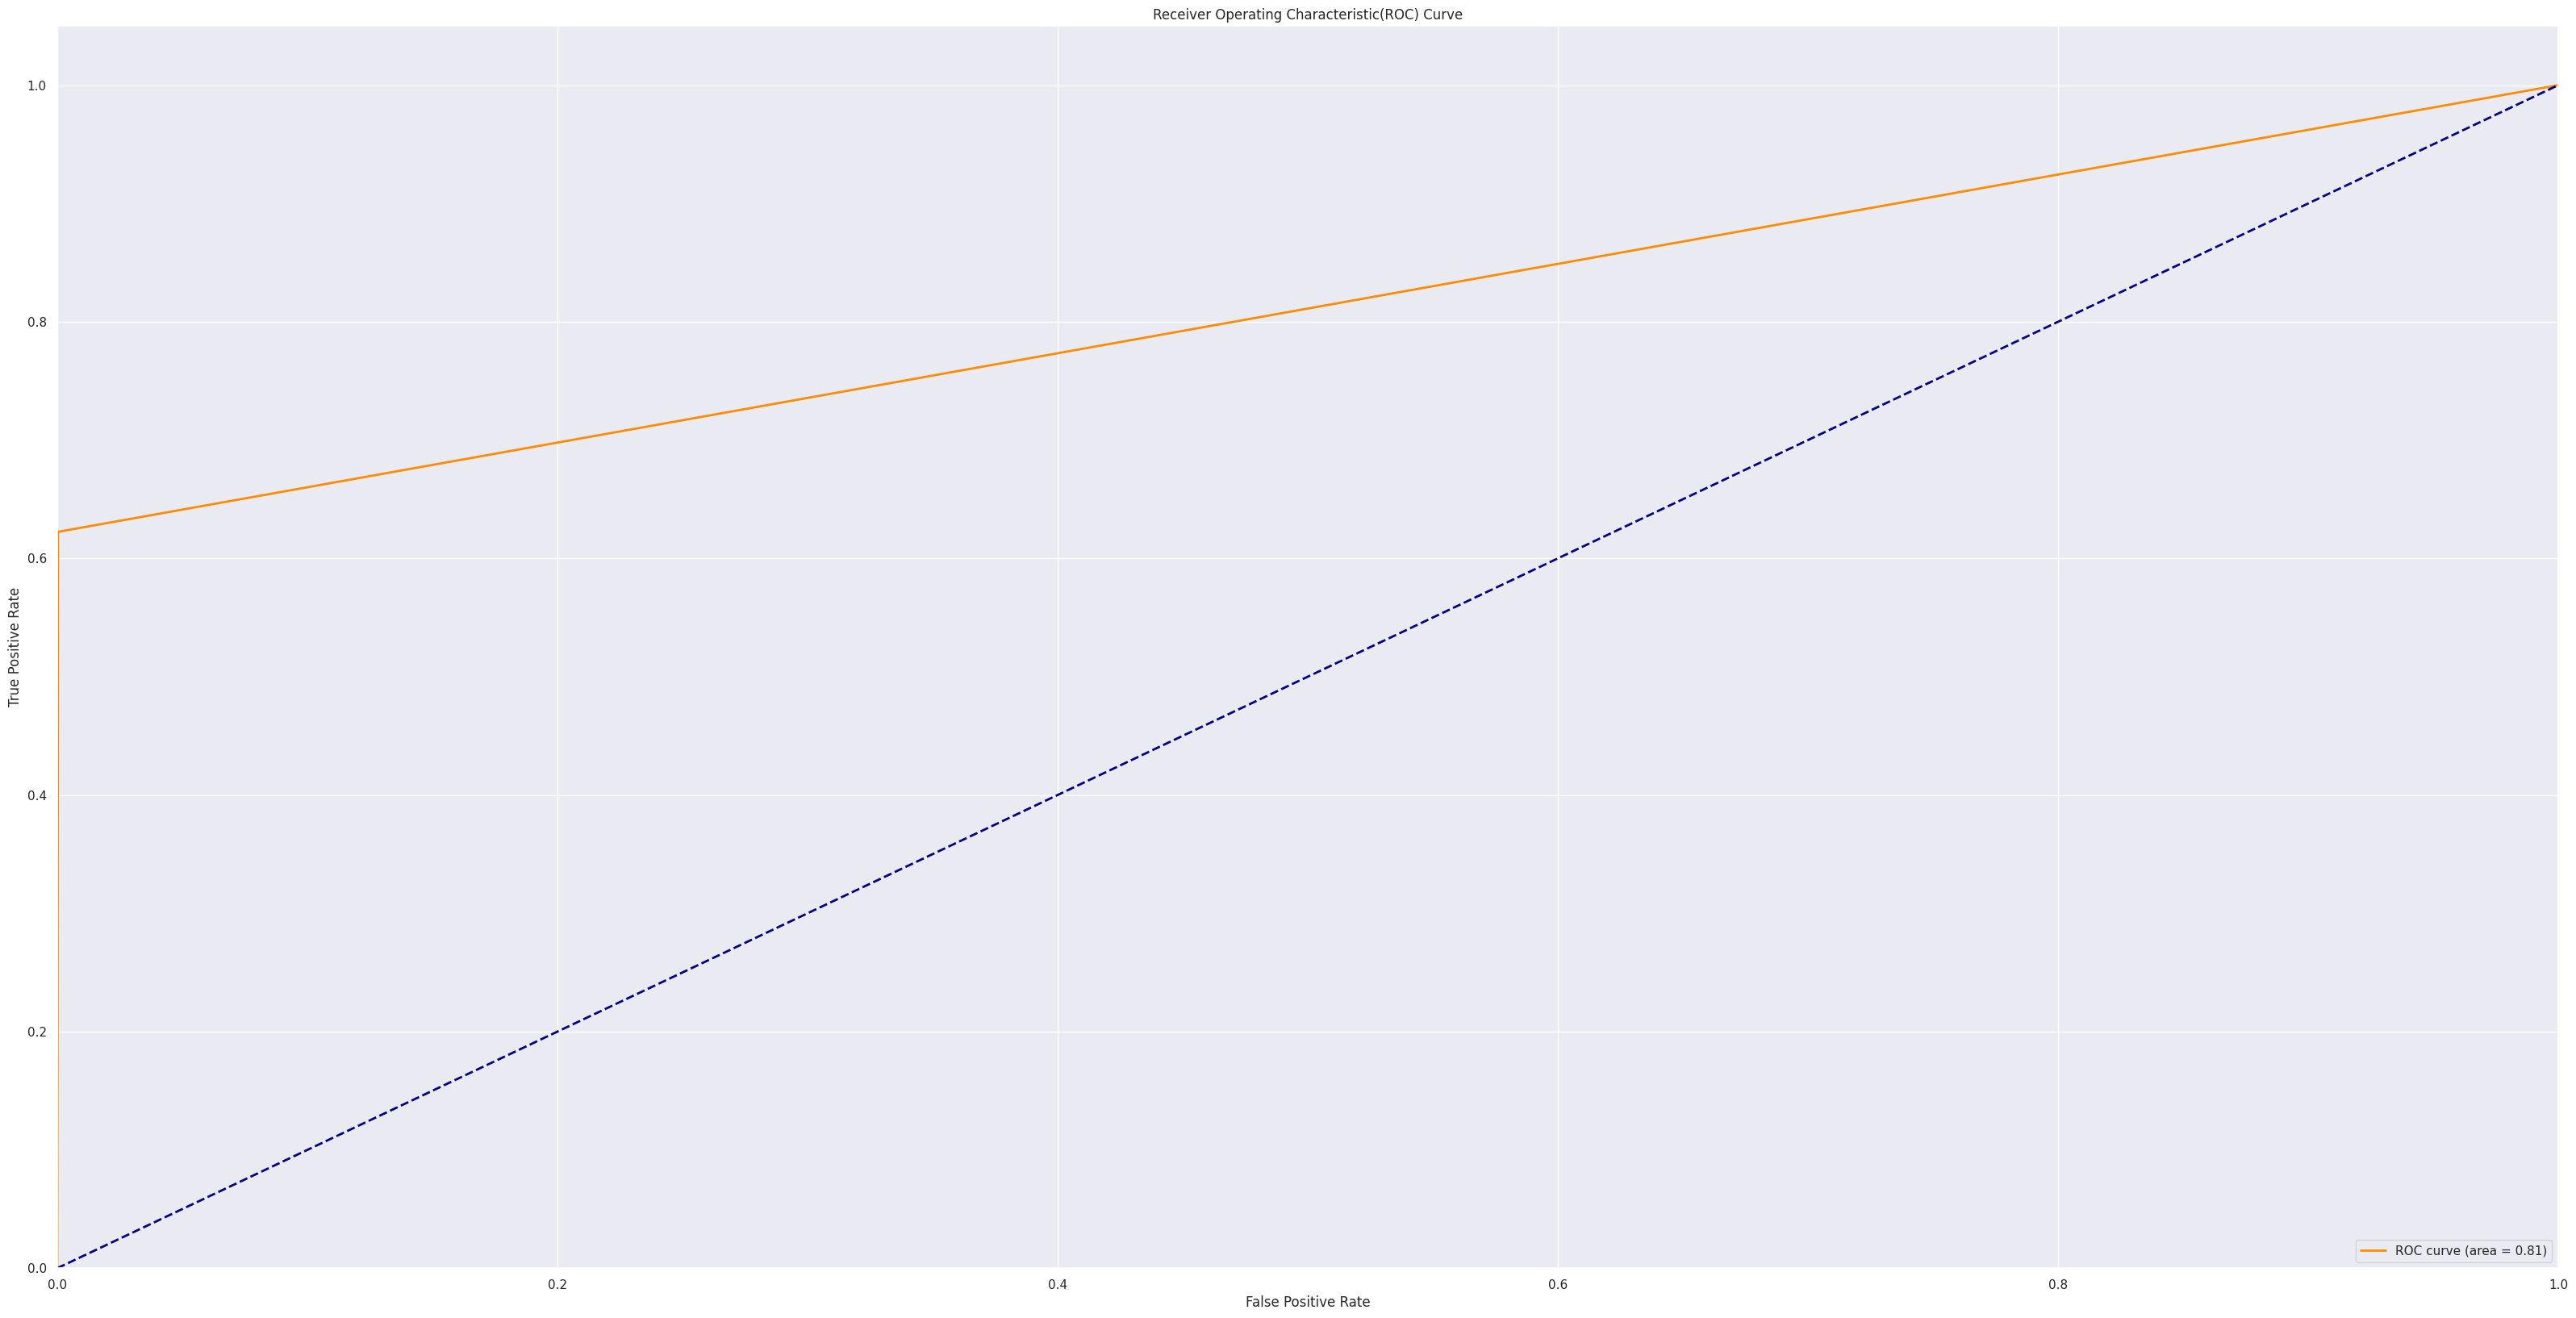

In [22]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


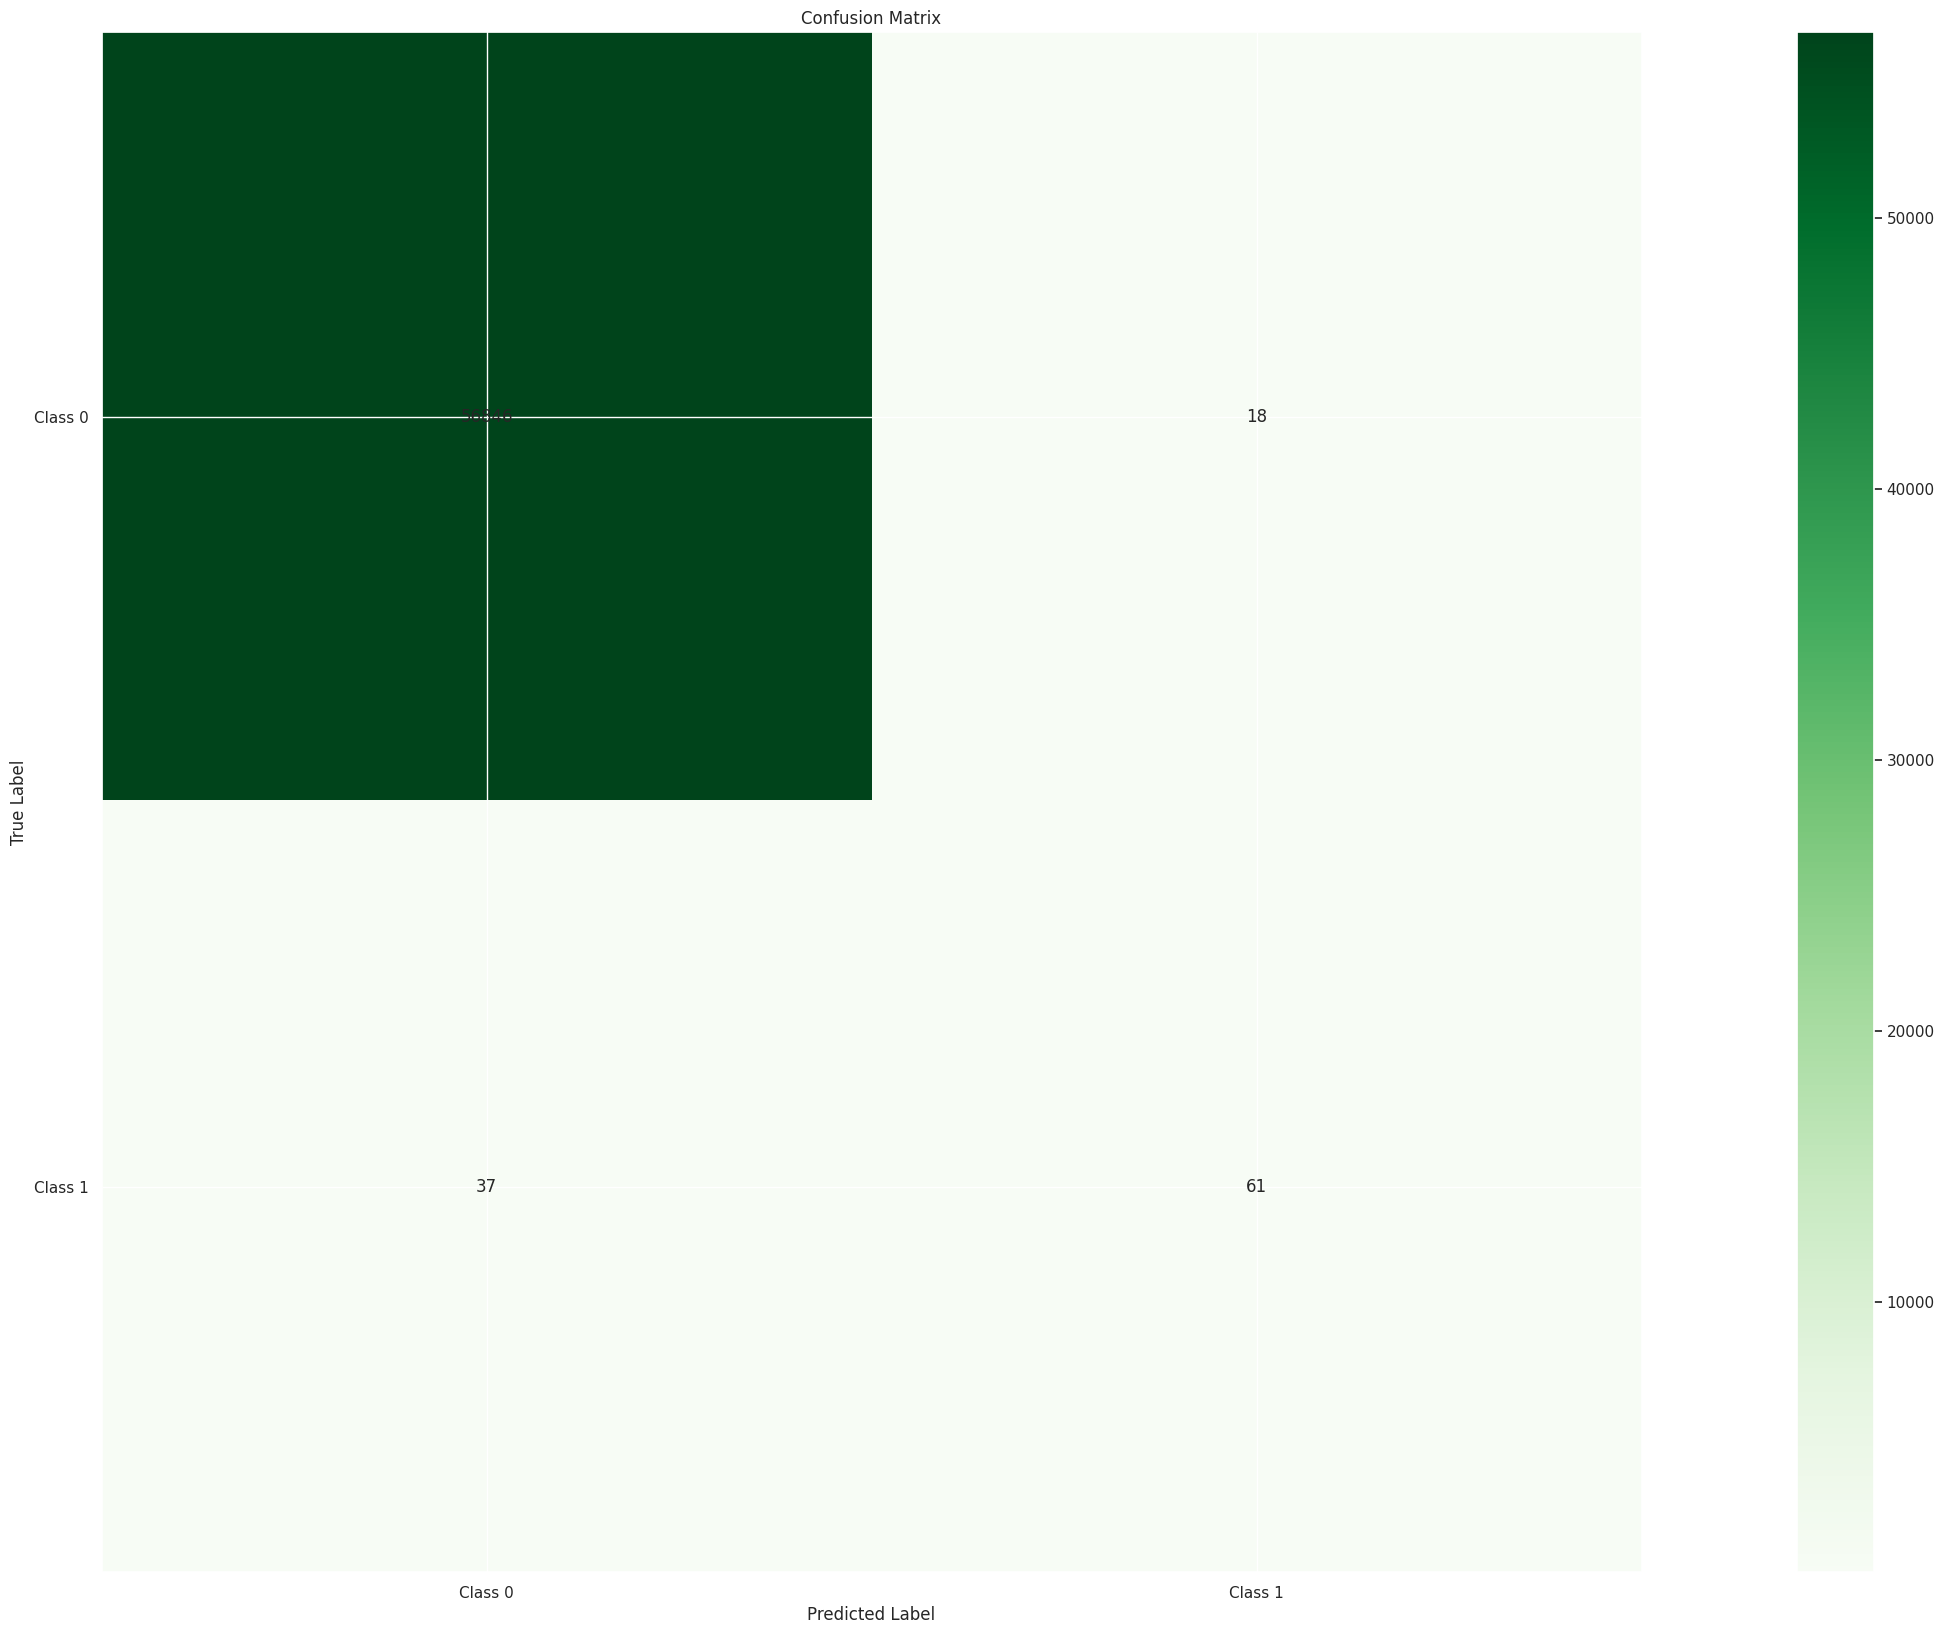

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(conf_mat, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.annotate(str(conf_mat[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Fitting and Evaluating a CNN Model##

Here we will still use the all features to build and evaluate a CNN model.

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np

np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

# Assuming X_train and X_test are numpy arrays
# Reshape data for CNN model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Reshape data to 3D format for CNN model
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Create CNN model
modelcnn = Sequential()
modelcnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelcnn.add(MaxPooling1D(pool_size=2))
modelcnn.add(Flatten())
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))

# Compile the model
modelcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
modelcnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))









Epoch 1/10
7121/7121 [==============================] - 26s 3ms/step - loss: 0.9091 - accuracy: 0.9981 - val_loss: 0.0159 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0246 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 3/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0851 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0243 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 25s 4ms/step - loss: 0.0261 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.0465 - accuracy: 0.9983 - val_loss: 0.0129 - val_accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0613 - accuracy: 0.9982 - val_loss: 0.0127 - val_ac

In [25]:
# Compile model
# Compile model
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

modelcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = modelcnn.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
3561/3561 [==============================] - 17s 4ms/step - loss: 0.0561 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 2/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 3/10
3561/3561 [==============================] - 16s 4ms/step - loss: 0.0233 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 4/10
3561/3561 [==============================] - 16s 4ms/step - loss: 0.0341 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 5/10
3561/3561 [==============================] - 15s 4ms/step - loss: 0.0159 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
3561/3561 [==============================] - 16s 5ms/step - loss: 0.0199 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 7/10
3561/3561 [==============================] - 16s 5ms/step - loss: 0.0211 - accuracy: 0.9983 - val_loss: 0.0127 - val_ac

In [26]:
# Evaluate model on test data
y_pred2 = modelcnn.predict(X_test)
y_pred_classes = (y_pred2 > 0.5).astype('int32')

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred2)


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)


1781/1781 [==============================] - 2s 1ms/step
Accuracy: 0.9982795547909132
Precision: 0.0
Recall: 0.0
AUC: 0.5009760129431626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comments**
The CNN model metrics is not a good one for this type of datasets as it has avery high error rate compared to others. The recall and precision are zero which is a redflag.

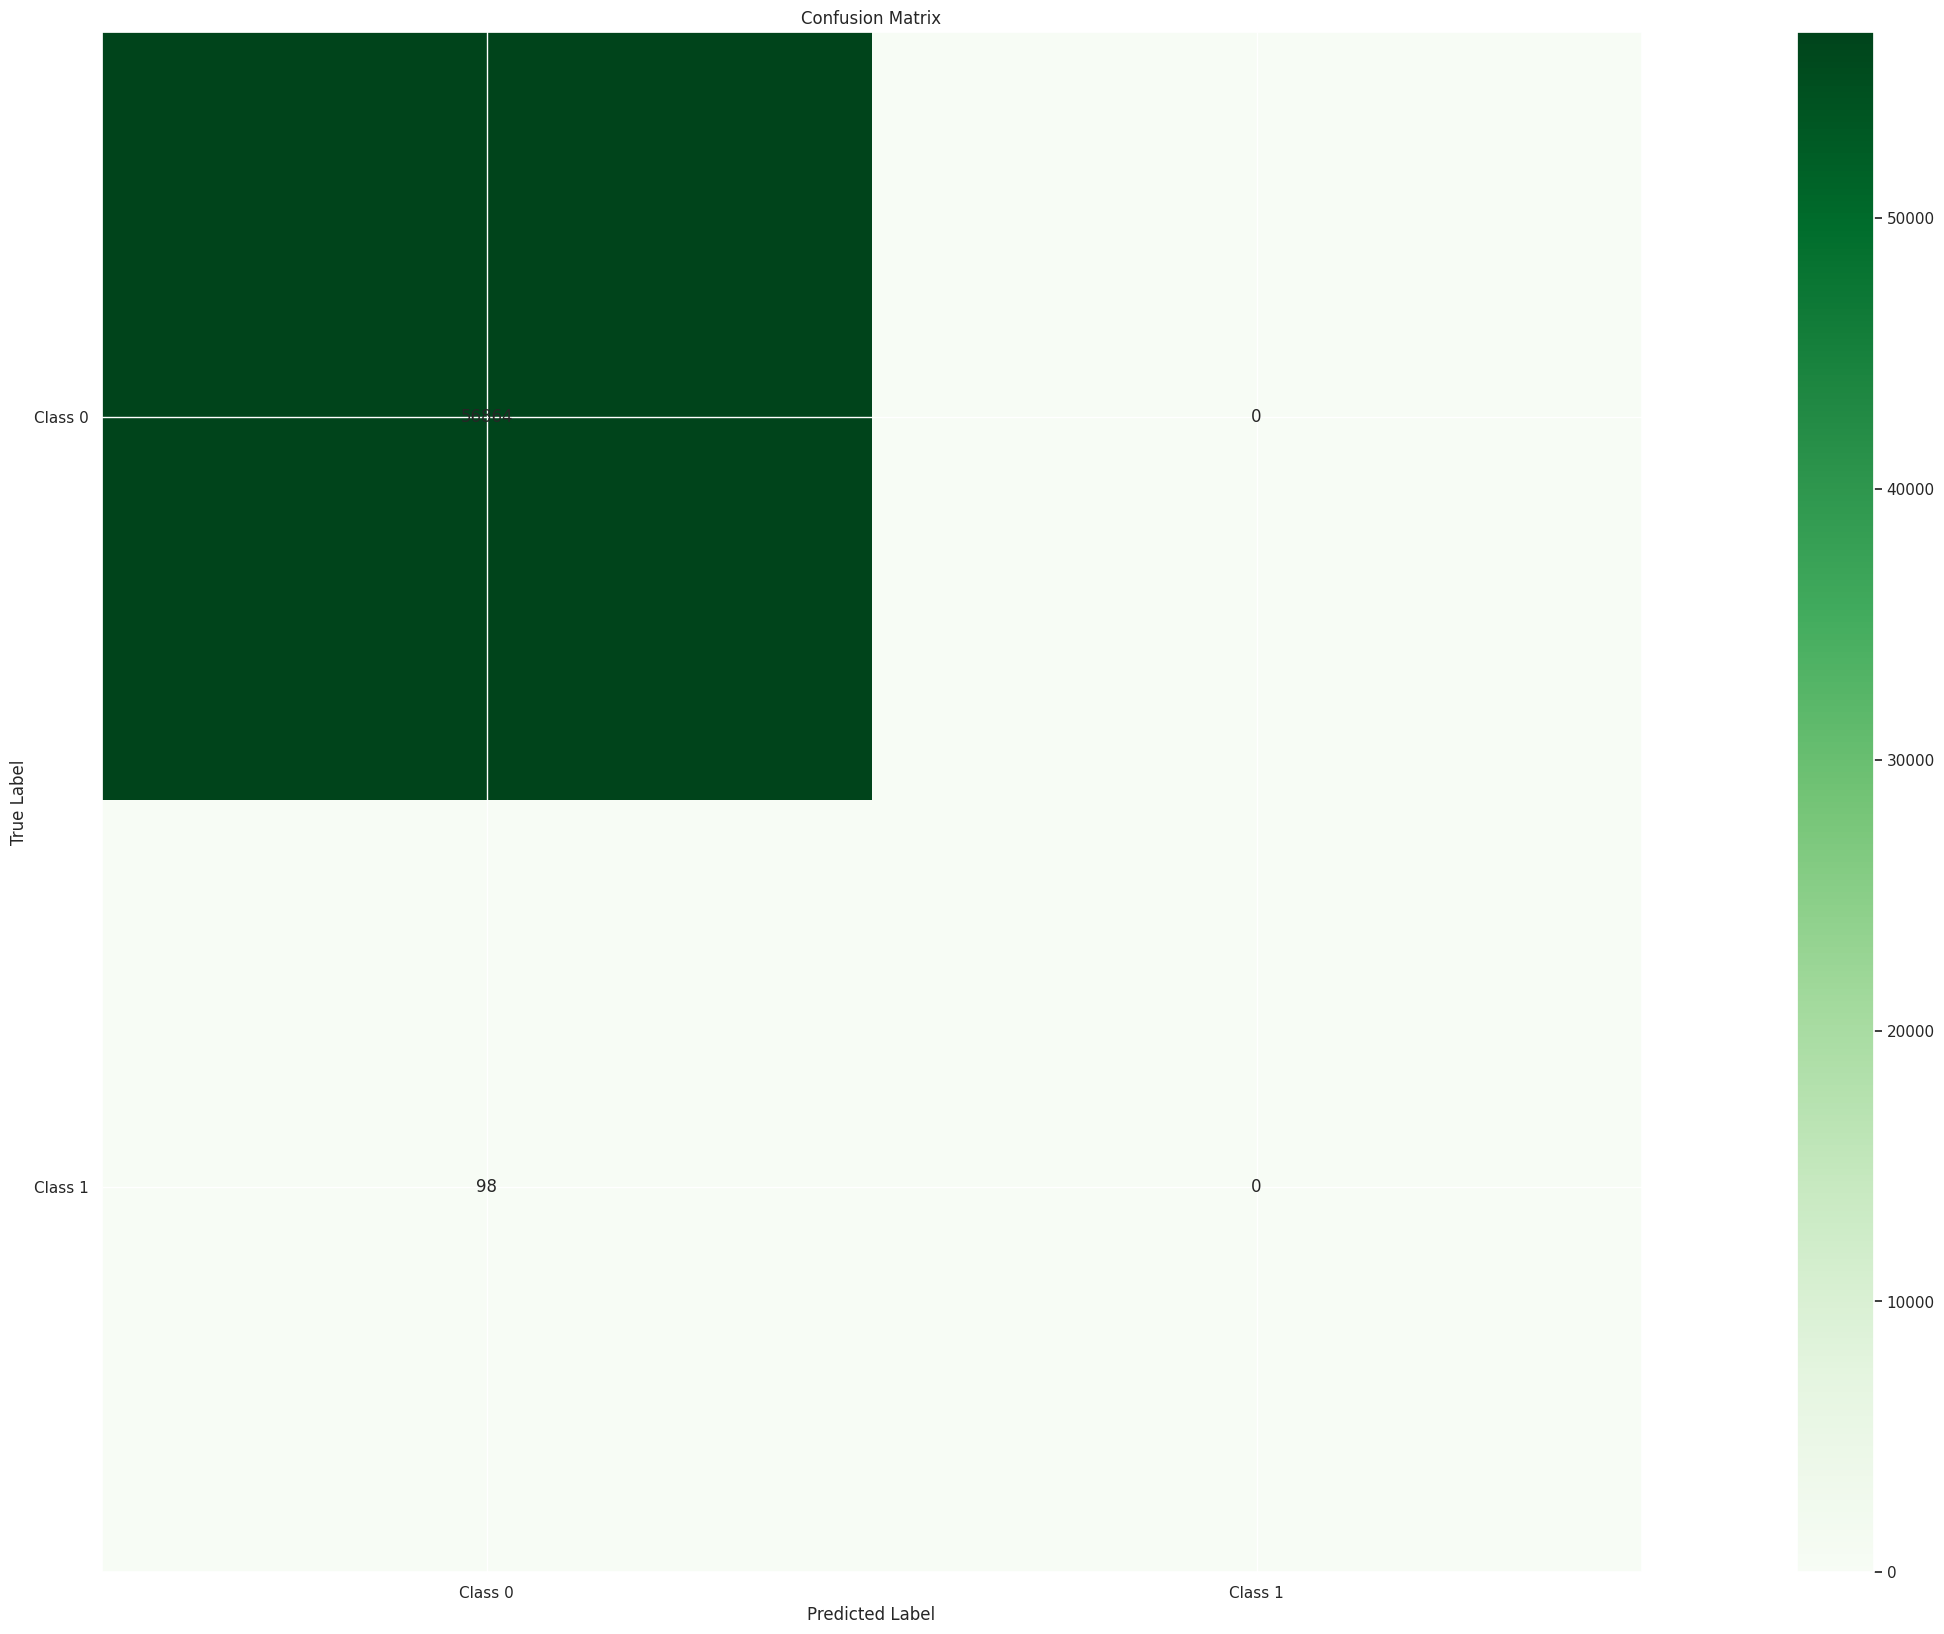

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Convert y_pred2 to binary values (0 or 1)
y_pred2_binary = np.round(y_pred2)

# Generate confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred2_binary)

# Plot the confusion matrix
plt.imshow(conf_mat2, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat2.shape[0]):
    for j in range(conf_mat2.shape[1]):
        plt.annotate(str(conf_mat2[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##Using The Best 10 Features to fit a SVM Model##

Below are ten best features relevant to the class and these will be used for fitting and evaulauting the machine learning models.

In [28]:
Features_New = Features.drop(['V1','V2','V5','V6','V8','V9','V13','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], axis = 1)
Features_New.dtypes

Time      float64
V3        float64
V4        float64
V7        float64
V10       float64
V11       float64
V12       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
Amount    float64
dtype: object

In [29]:
#Spliting the PPS_BioData datasets into training and testing.
X_train1, X_test1, y_train1, y_test1 = train_test_split(Features_New, Class, stratify= Class,test_size=0.2)
print('Shapes XTrain:', X_train1.shape) #Print the shape of the x-train
print('Shapes XTest:', X_test1.shape)


Shapes XTrain: (227845, 13)
Shapes XTest: (56962, 13)


##Logistics Regression##

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model3 = LogisticRegression()

# fit model
model3.fit(X_train1, y_train1)

# predict on test set
y_pred3 = model3.predict(X_test1)
y_prob3 = model3.predict_proba(X_test1)[:, 1]

# evaluation metrics
print('Accuracy:', accuracy_score(y_test1, y_pred3))
print('Precision:', precision_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('F1 score:', f1_score(y_test, y_pred3))
print('ROC AUC score:', roc_auc_score(y_test, y_prob3))
#Confusion Matrix of the Model.
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9992626663389628
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.5034735581064165
Confusion matrix:
 [[56774    90]
 [   98     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Comments**

This model is not better in any way. There are lots of misclassifications. The confusion matrix shows 188 wrong predictions and the positive predictions were all wrong. However, using the best 10 features did not improve the performance of the model still

##SVM Model##

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)
# Create an SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train1, y_train1)

# Predict the classes for the test set
y_pred4 = svm_model.predict(X_test1)

# Generate the classification report
report = classification_report(y_test1, y_pred4)
print("Classification Report:")
print(report)

# Generate the confusion matrix
confusion_mat4 = confusion_matrix(y_test1, y_pred4)
print("Confusion Matrix:")
print(confusion_mat4)

# Calculate recall and precision
true_positive = confusion_mat4[1, 1]
false_negative = confusion_mat4[1, 0]
false_positive = confusion_mat4[0, 1]

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)

print("Recall:", recall)
print("Precision:", precision)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56864     0]
 [   98     0]]
Recall: 0.0
Precision: nan
AUC: 0.811066217426757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-31-50ab5a49e960>:33: RuntimeWarning: invalid valu

##Fit Model Without Balancing the Classes##

Ordinarily, this stage should have actually come first. It is about fitting the model without addressing the imbalanced classes. 

In this session , we shall go through the models again and run some other ones.

In [32]:
Class1 = Data['Class']
Class1.dtypes


dtype('int64')

In [33]:
Features1 = Data.drop('Class', axis = 1)
Features1.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Features1, Class1, stratify= Class1,test_size=0.2)
print('Shapes XTrain:', X_train2.shape) #Print the shape of the x-train
print('Shapes XTest:', X_test2.shape) 

Shapes XTrain: (227845, 30)
Shapes XTest: (56962, 30)


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)
# Create an SVM model
svm_model2 = SVC()

# Fit the model on the training data
svm_model2.fit(X_train2, y_train2)

# Predict the classes for the test set
y_pred5 = svm_model2.predict(X_test2)

# Generate the classification report
report5 = classification_report(y_test2, y_pred5)
print("Classification Report:")
print(report)

# Generate the confusion matrix
confusion_mat5 = confusion_matrix(y_test2, y_pred5)
print("Confusion Matrix:")
print(confusion_mat5)

# Calculate recall and precision
true_positive = confusion_mat5[1, 1]
false_negative = confusion_mat5[1, 0]
false_positive = confusion_mat5[0, 1]

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)

print("Recall:", recall)
print("Precision:", precision)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56864     0]
 [   98     0]]
Recall: 0.0
Precision: nan
AUC: 0.811066217426757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-35-8ddf782c0103>:33: RuntimeWarning: invalid valu

##Logistics Regression on Imbalanced Data##

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model5 = LogisticRegression()

# fit model
model5.fit(X_train2, y_train2)

# predict on test set
y_pred6 = model5.predict(X_test2)
y_prob6 = model5.predict_proba(X_test2)[:, 1]

# evaluation metrics
print('Accuracy:', accuracy_score(y_test2, y_pred6))
print('Precision:', precision_score(y_test, y_pred6))
print('Recall:', recall_score(y_test, y_pred6))
print('F1 score:', f1_score(y_test, y_pred6))
print('ROC AUC score:', roc_auc_score(y_test2, y_prob6))
#Confusion Matrix of the Model.
print('Confusion matrix:\n', confusion_matrix(y_test2, y_pred6))

Accuracy: 0.9989993328885924
Precision: 0.009523809523809525
Recall: 0.01020408163265306
F1 score: 0.009852216748768475
ROC AUC score: 0.9475196099824286
Confusion matrix:
 [[56832    32]
 [   25    73]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Random Forest Model##

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train2, y_train2)

# Predict on the test set
y_pred7 = rf_classifier.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred7)
precision = precision_score(y_test2, y_pred7)
recall = recall_score(y_test2, y_pred7)
f1 = f1_score(y_test2, y_pred7)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9995962220427653
Precision: 0.9411764705882353
Recall: 0.8163265306122449
F1 Score: 0.8743169398907105


##Confusion Matric for Random Forest##

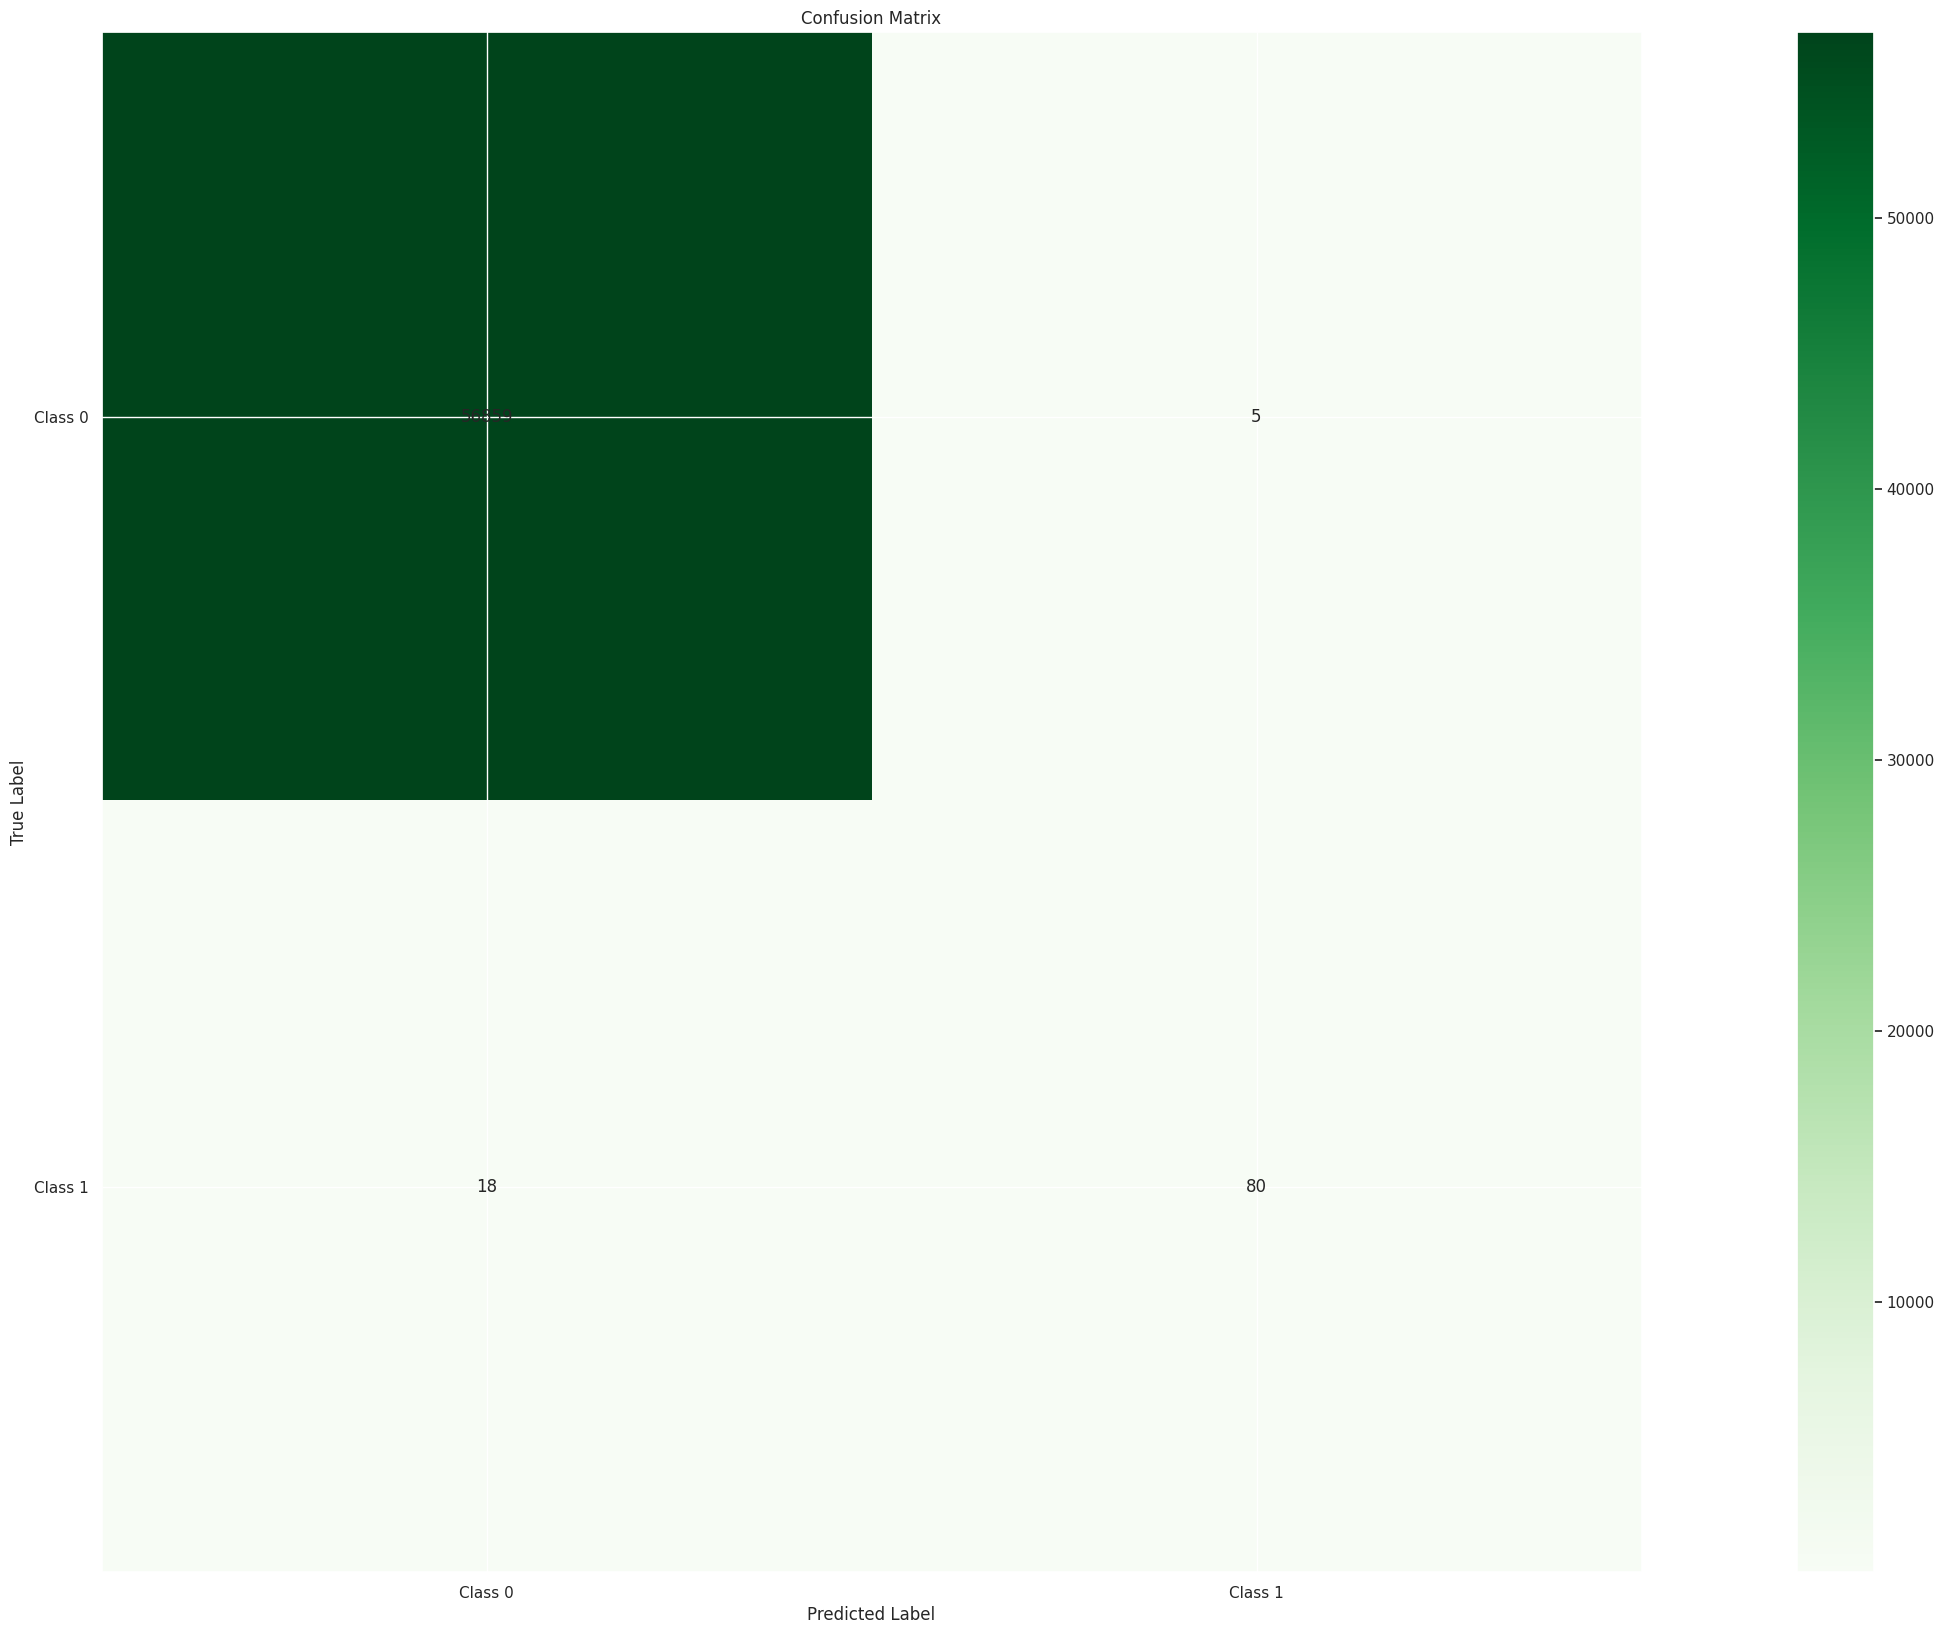

In [38]:
# Convert y_pred2 to binary values (0 or 1)
y_pred2_binary = np.round(y_pred7)

# Generate confusion matrix
confusion_mat5 = confusion_matrix(y_test2, y_pred2_binary)

# Plot the confusion matrix
plt.imshow(confusion_mat5, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(confusion_mat5.shape[0]):
    for j in range(confusion_mat5.shape[1]):
        plt.annotate(str(confusion_mat5[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##AUC For Random Forest##

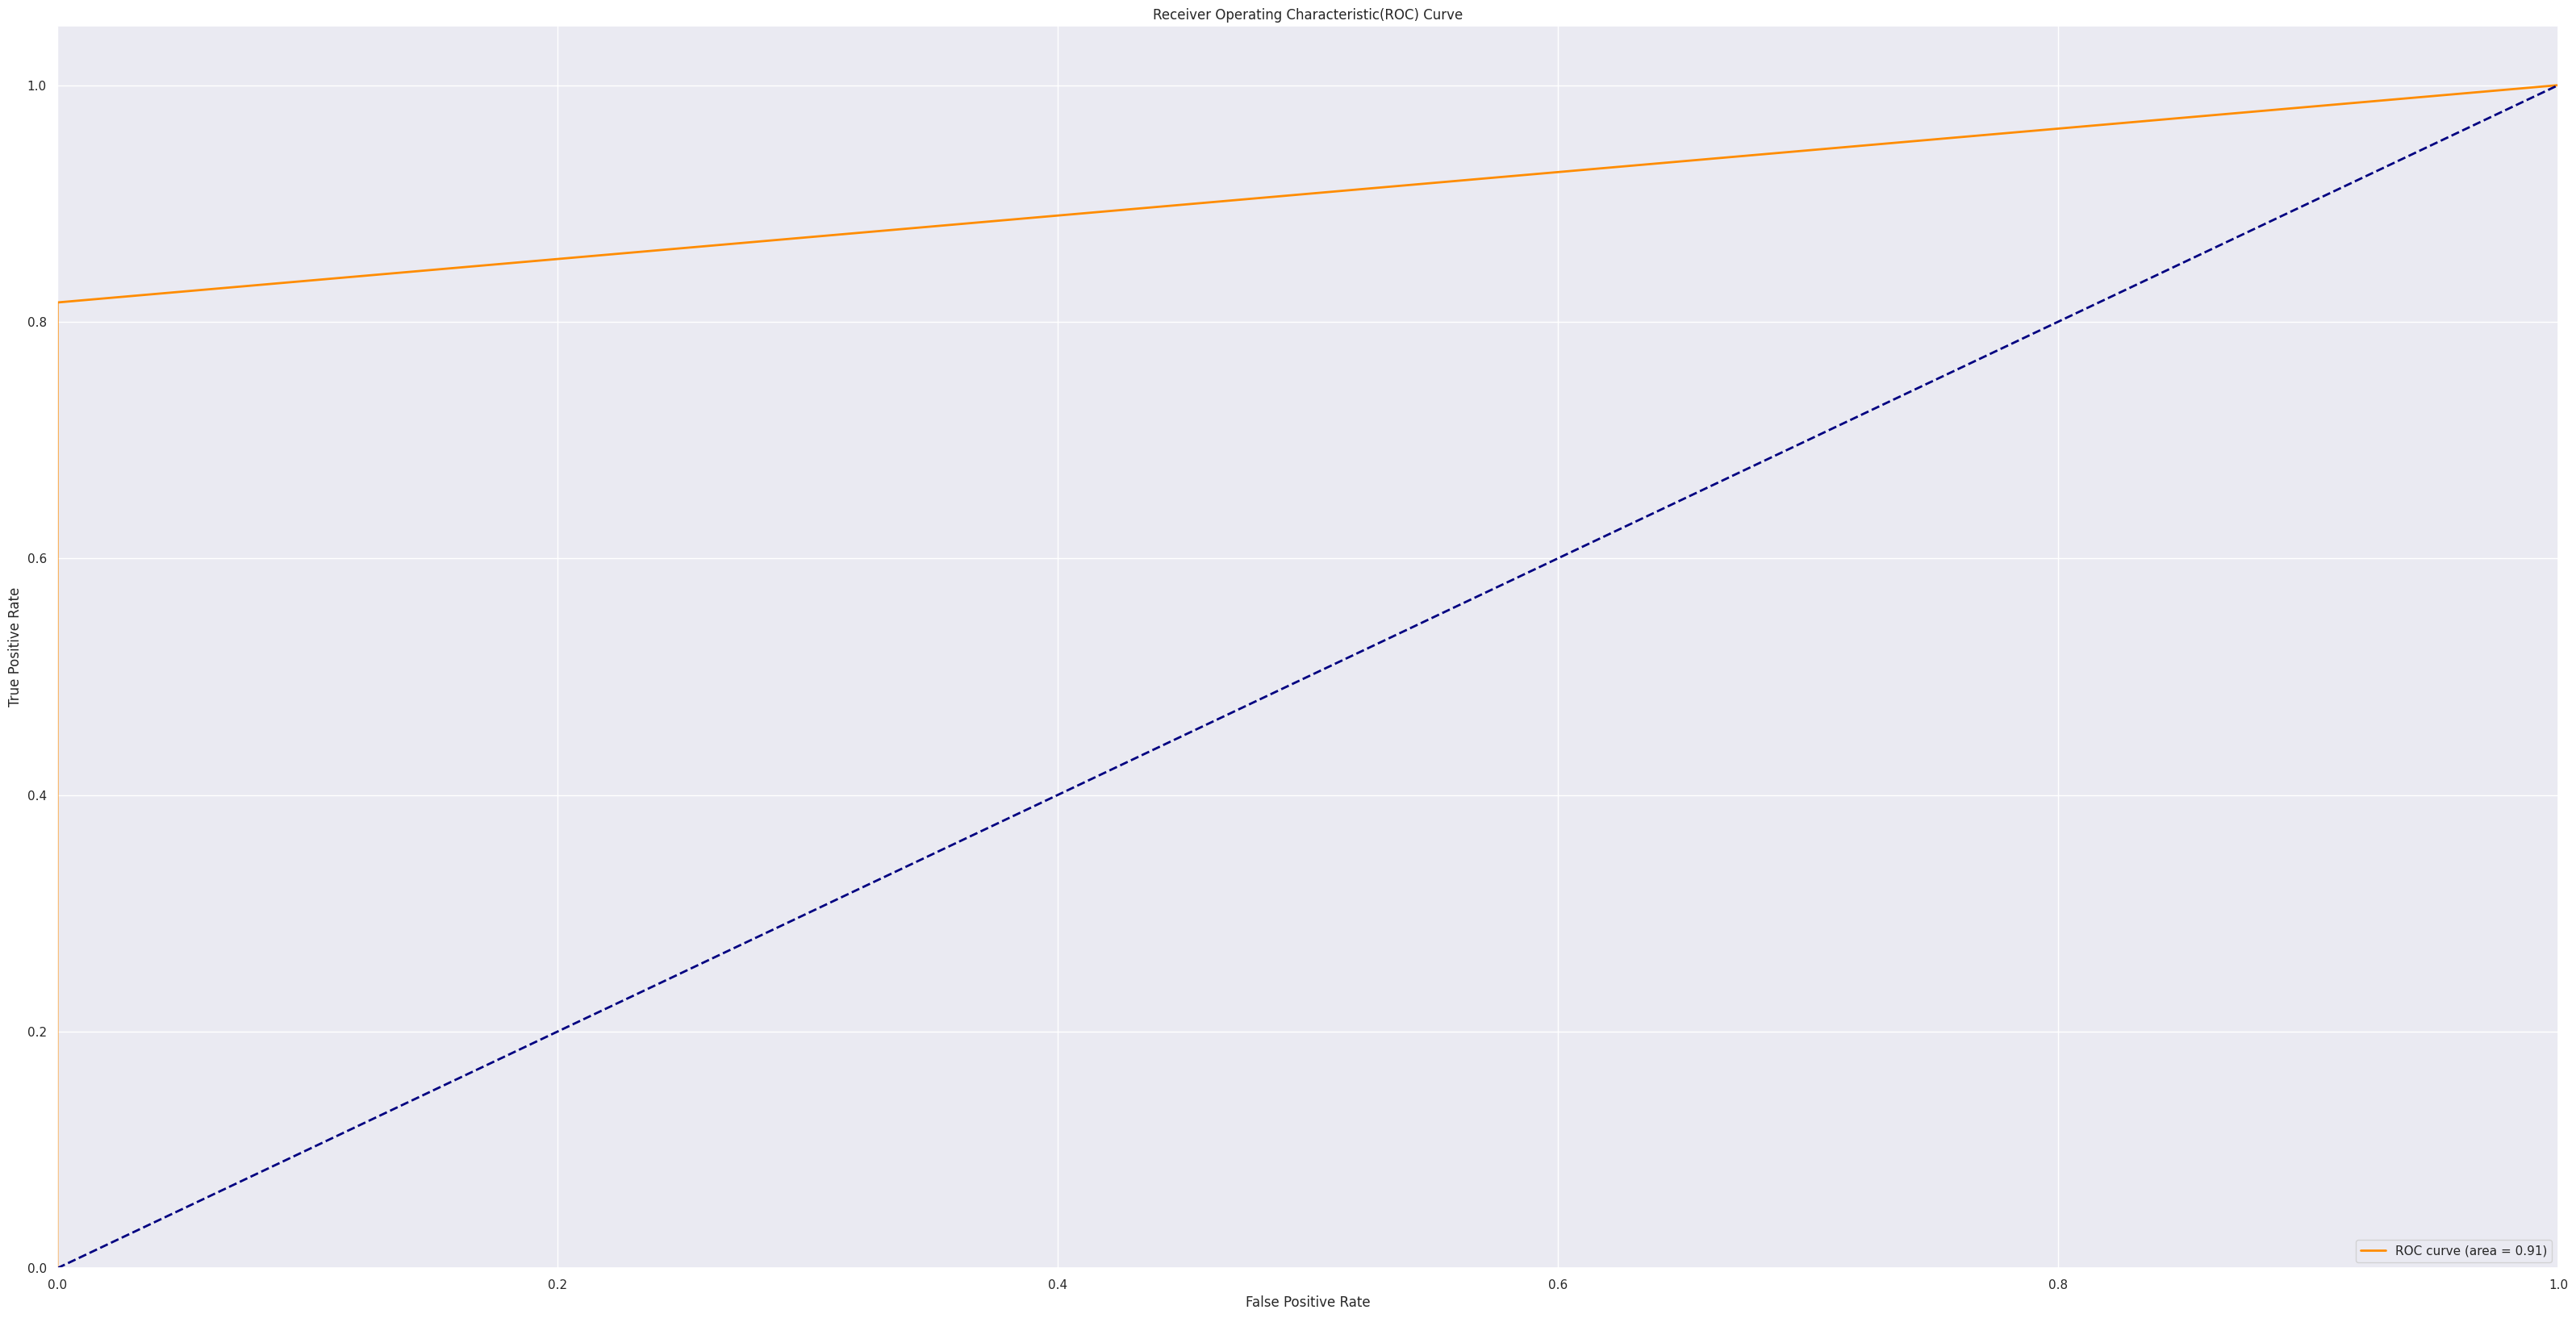

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test2, y_pred7)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train2, y_train2)

# Predict on the test set
y_pred8 = nb_classifier.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred8)
precision = precision_score(y_test2, y_pred8)
recall = recall_score(y_test2, y_pred8)
f1 = f1_score(y_test2, y_pred8)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9920824409255293
Precision: 0.13457556935817805
Recall: 0.6632653061224489
F1 Score: 0.22375215146299482


##Testing with Validation Data##

Here, after getting the right model that is able to predict the fraudulent and nonfraudulent credit card transactions, we will be validating the model with another datasets that are randomly selected from the original datasets to re-validate the quality of the model decisions.

In [41]:
import random
Data_Val= Data.sample(n=1000, random_state=random.seed(222))
Data_Val



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227609,145140.0,1.733423,-0.886469,-0.086454,0.593330,-1.128395,-0.351724,-0.696451,0.036002,1.697326,...,0.090867,0.193681,0.155940,-0.128463,-0.417222,-0.429084,0.032980,-0.008012,128.00,0
167827,118902.0,-0.959587,0.120586,-0.205949,-1.516400,2.802636,3.654532,-0.109162,1.192094,-0.080675,...,-0.324720,-1.198190,0.119572,0.565404,0.414279,0.290134,0.145597,0.038286,78.88,0
130595,79388.0,1.192622,0.208522,0.150086,0.455611,-0.013066,-0.102287,-0.135837,0.132255,-0.130158,...,-0.235711,-0.706007,0.111837,-0.362519,0.139457,0.128741,-0.014254,0.012825,1.98,0
110032,71654.0,1.065967,0.269890,1.039706,2.357700,-0.339709,0.468535,-0.456970,0.323322,-0.590260,...,0.214077,0.553161,-0.036453,-0.004986,0.302807,0.111982,0.019119,0.015373,10.59,0


In [42]:
Class3 = Data_Val['Class']
Class3

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
227609    0
167827    0
130595    0
110032    0
131879    0
Name: Class, Length: 1000, dtype: int64

In [43]:
Feature3 = Data_Val.drop('Class', axis = 1)
Feature3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227609,145140.0,1.733423,-0.886469,-0.086454,0.593330,-1.128395,-0.351724,-0.696451,0.036002,1.697326,...,-0.001379,0.090867,0.193681,0.155940,-0.128463,-0.417222,-0.429084,0.032980,-0.008012,128.00
167827,118902.0,-0.959587,0.120586,-0.205949,-1.516400,2.802636,3.654532,-0.109162,1.192094,-0.080675,...,0.441856,-0.324720,-1.198190,0.119572,0.565404,0.414279,0.290134,0.145597,0.038286,78.88
130595,79388.0,1.192622,0.208522,0.150086,0.455611,-0.013066,-0.102287,-0.135837,0.132255,-0.130158,...,-0.123500,-0.235711,-0.706007,0.111837,-0.362519,0.139457,0.128741,-0.014254,0.012825,1.98
110032,71654.0,1.065967,0.269890,1.039706,2.357700,-0.339709,0.468535,-0.456970,0.323322,-0.590260,...,-0.200890,0.214077,0.553161,-0.036453,-0.004986,0.302807,0.111982,0.019119,0.015373,10.59


In [44]:
# Predict on the test set
y_pred9 = rf_classifier.predict(Feature3)

# Calculate evaluation metrics
accuracy = accuracy_score(Class3, y_pred9)
precision = precision_score(Class3, y_pred9)
recall = recall_score(Class3, y_pred9)
f1 = f1_score(Class3, y_pred9)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Comments**

From the model metrics on the 1000 validation datasets, it is evidenced that the model still perfroms very well and it is able to predict all negative and positive cases correctly.

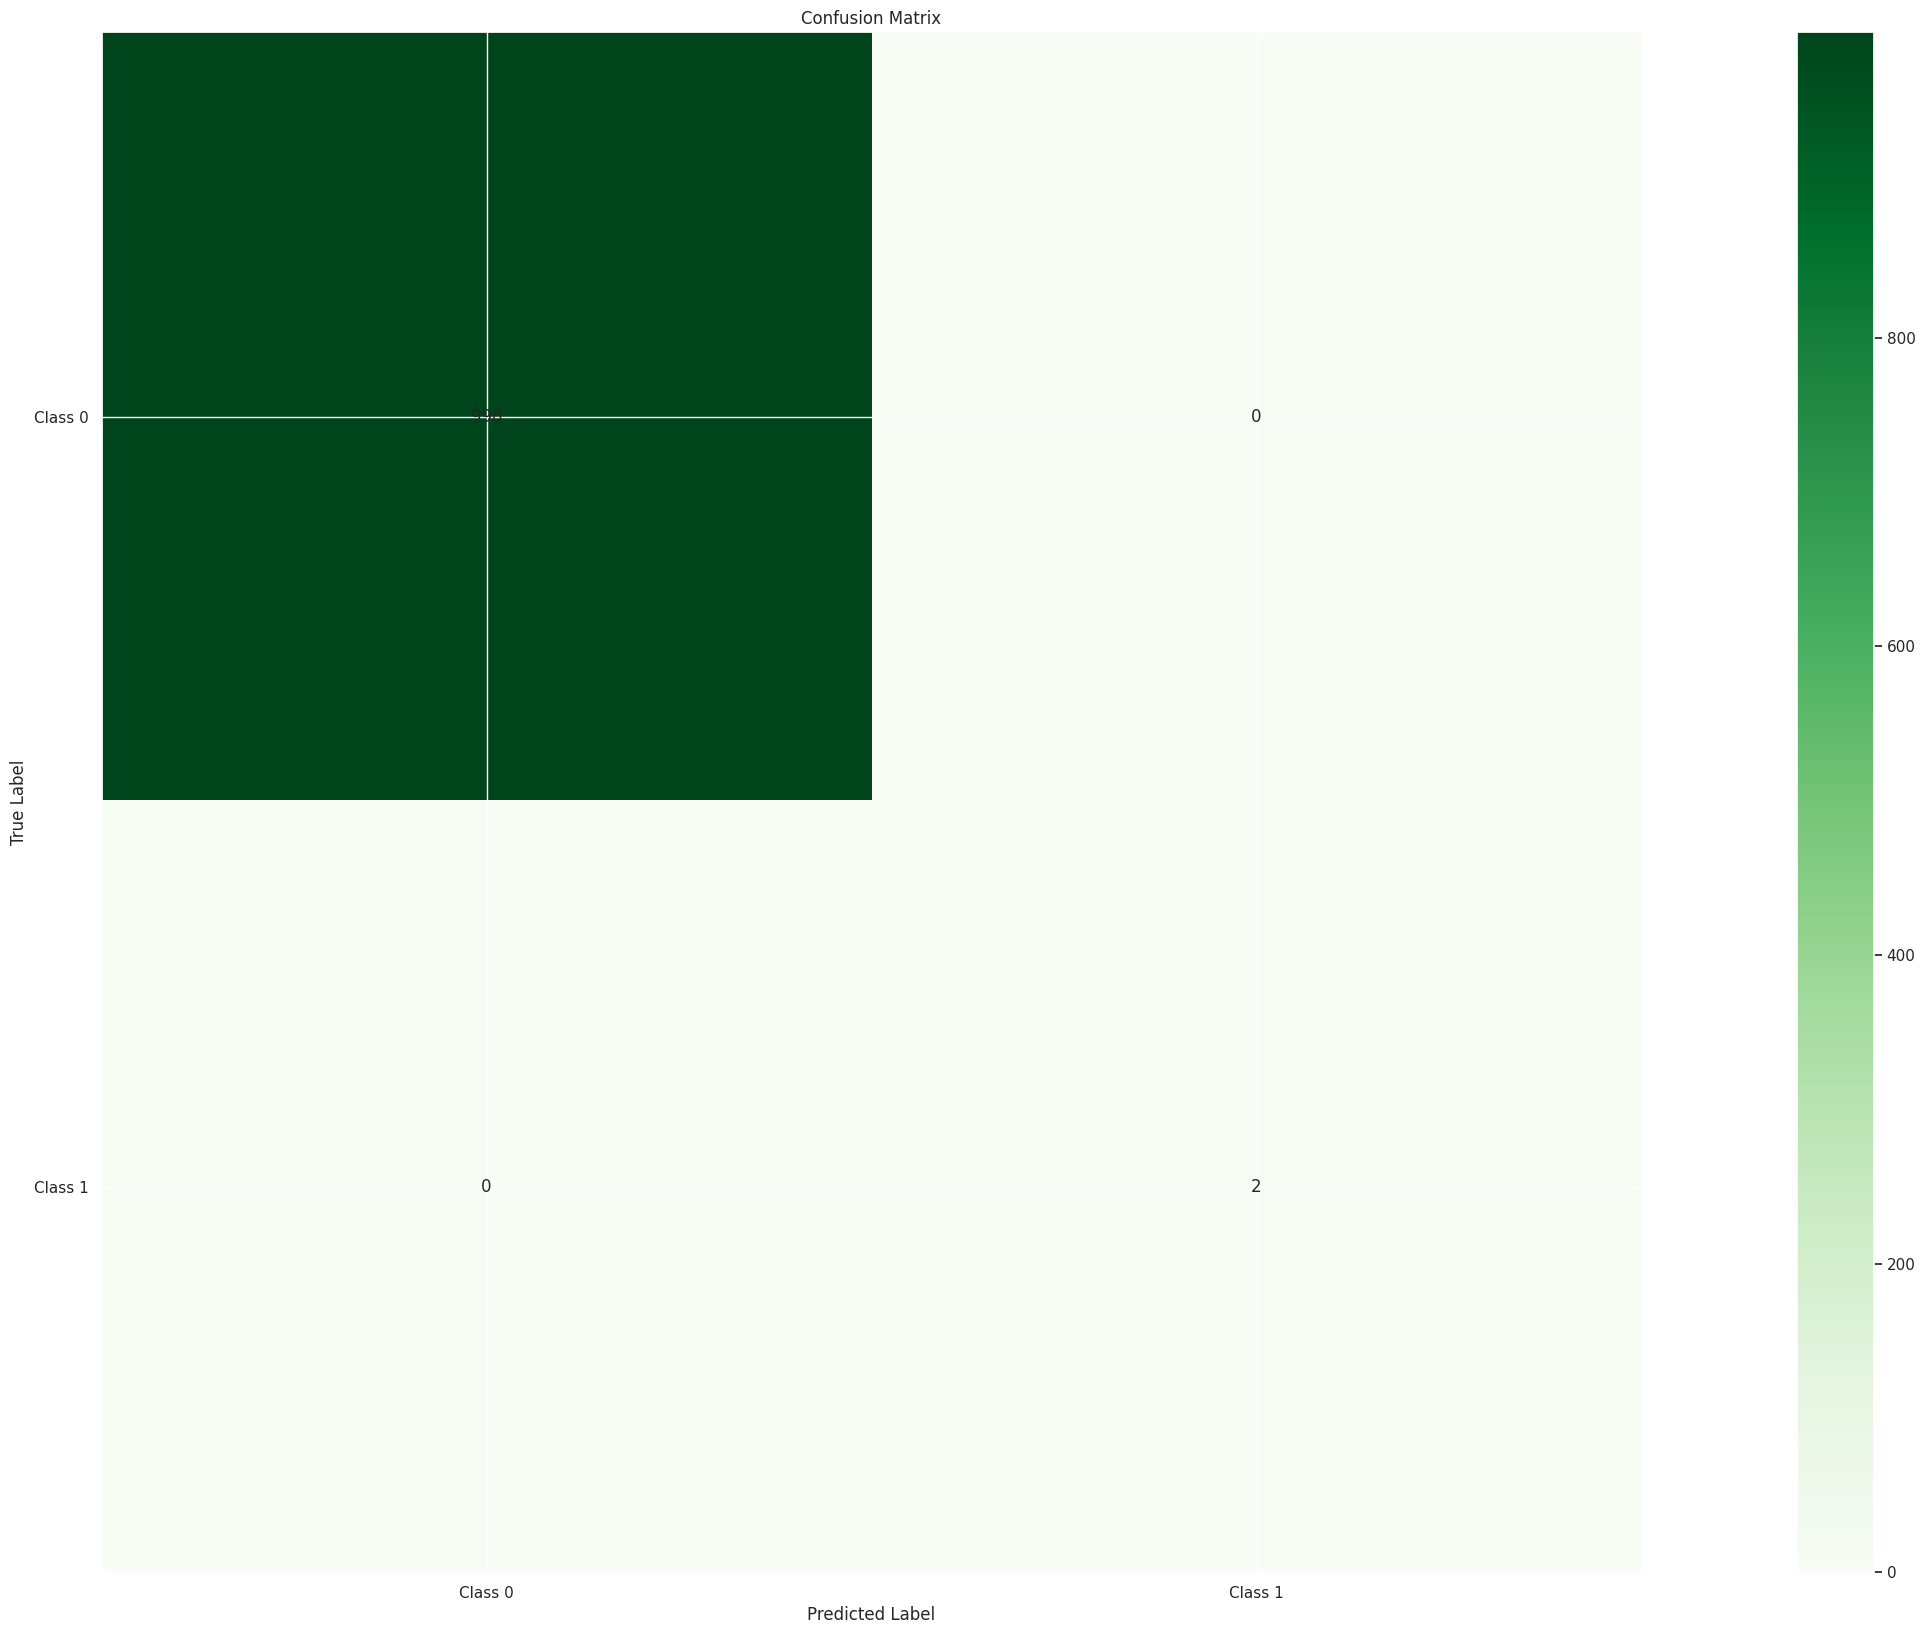

In [45]:
# Convert y_pred2 to binary values (0 or 1)
y_pred2_binary1 = np.round(y_pred9)

# Generate confusion matrix
confusion_mat9 = confusion_matrix(Class3, y_pred2_binary1)

# Plot the confusion matrix
plt.imshow(confusion_mat9, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(confusion_mat9.shape[0]):
    for j in range(confusion_mat9.shape[1]):
        plt.annotate(str(confusion_mat9[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

In [46]:
Count_FraudVal = Class3[Class3==1]
Count_FraudVal.count()

2

##Conclusion##
Random Forest Classifer is able to predcit fraulent transactions in credit data based on the research and the insight above.